In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.shape

(145460, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
# le=LabelEncoder()

In [7]:
df['RainTomorrow'].dtype


dtype('O')

In [8]:
df['RainTomorrow'].isnull().sum()

3267

In [9]:
df.shape[0]

145460

In [10]:
df.dropna(subset=['RainTomorrow'],inplace=True)
df.dropna(subset=['RainToday'],inplace=True)            
            

In [11]:
df['RainTomorrow'].isnull().sum()

0

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()

In [14]:
df['RainTomorrow']=le.fit_transform(df['RainTomorrow'])
df['RainToday']=le.fit_transform(df['RainToday'])

In [15]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [16]:
df['RainTomorrow'].value_counts()

RainTomorrow
0    109586
1     31201
Name: count, dtype: int64

In [17]:
#dataset is highly inbalanced

## We will  perform oversampling of minority class

In [18]:
from sklearn.utils import resample
majority_class=df[df['RainTomorrow']==0]
minority_class=df[df['RainTomorrow']==1]
minority_class_oversampled=resample(minority_class,replace=True,n_samples=len(majority_class),random_state=17)

oversampled=pd.concat([majority_class,minority_class_oversampled])


In [19]:
oversampled['RainTomorrow'].value_counts()

RainTomorrow
0    109586
1    109586
Name: count, dtype: int64

## Now Lets check patterns associated with na values in our dataset

In [20]:
import seaborn as sns

<Axes: >

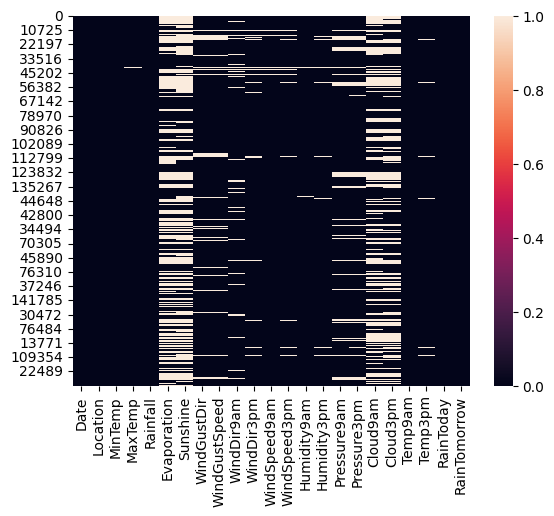

In [21]:
sns.heatmap(oversampled.isnull())

In [22]:
#clearly 4 features-evap,sunshine,cloud9am,cloud3pm have very high null values
#but when we check their missing percentages the are less than <50%so we perform properimputation

## Imputation and Transformation

In [23]:
oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [24]:
# #fill all categorical values with mode


In [25]:
for col in oversampled.select_dtypes(include=['object']).columns:
    oversampled[col]=oversampled[col].fillna(oversampled[col].mode()[0])

In [26]:
oversampled['WindGustDir'].isnull().sum()

0

In [27]:
laE=LabelEncoder()
for col in oversampled.select_dtypes(include=['object']).columns:
    oversampled[col]=le.fit_transform(oversampled[col])
    #converted categorical values to continuos


In [28]:
oversampled.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,395,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,396,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,397,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,398,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,399,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
#multiple imputation by chained equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed=oversampled.copy(deep=True)
mi=IterativeImputer()
MiceImputed.iloc[:,:]=mi.fit_transform(oversampled)


In [31]:
MiceImputed.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [32]:
Interpolated = oversampled.interpolate(method='linear', axis=0).ffill().bfill()

In [33]:
Interpolated.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [34]:
#We will later compare with imputed dataframe 

In [35]:
MiceImputed.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,395,2,13.4,22.9,0.6,5.717654,7.389679,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.827774,16.9,21.8,0,0
1,396,2,7.4,25.1,0.0,5.658162,11.516565,14,44.0,6,...,44.0,25.0,1010.6,1007.8,1.733097,2.611236,17.2,24.3,0,0
2,397,2,12.9,25.7,0.0,7.733143,12.305766,15,46.0,13,...,38.0,30.0,1007.6,1008.7,1.847182,2.000000,21.0,23.2,0,0
3,398,2,9.2,28.0,0.0,5.948569,11.786055,4,24.0,9,...,45.0,16.0,1017.6,1012.8,1.232968,2.127165,18.1,26.5,0,0
4,399,2,17.5,32.3,1.0,6.884889,5.717397,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0


In [36]:
Interpolated.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,395,2,13.4,22.9,0.6,12.0,12.3,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.00,2.0,16.9,21.8,0,0
1,396,2,7.4,25.1,0.0,12.0,12.3,14,44.0,6,...,44.0,25.0,1010.6,1007.8,7.75,2.0,17.2,24.3,0,0
2,397,2,12.9,25.7,0.0,12.0,12.3,15,46.0,13,...,38.0,30.0,1007.6,1008.7,7.50,2.0,21.0,23.2,0,0
3,398,2,9.2,28.0,0.0,12.0,12.3,4,24.0,9,...,45.0,16.0,1017.6,1012.8,7.25,5.0,18.1,26.5,0,0
4,399,2,17.5,32.3,1.0,12.0,12.3,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.00,8.0,17.8,29.7,0,0


In [37]:
#Interpolation not that good we can observe particularly for those 4 cols

## Detecting outliers with Inter quartile Range

In [38]:
q1=MiceImputed.quantile(0.25)
q3=MiceImputed.quantile(0.75)
iqr=q3-q1
print(iqr)

Date             1539.000000
Location           25.000000
MinTemp             9.200000
MaxTemp            10.300000
Rainfall            2.400000
Evaporation         4.097141
Sunshine            5.969854
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        31.000000
Pressure9am         8.788689
Pressure3pm         8.800000
Cloud9am            4.000000
Cloud3pm            3.677334
Temp9am             9.300000
Temp3pm             9.900000
RainToday           1.000000
RainTomorrow        1.000000
dtype: float64


In [39]:
#Larger values of IQR indicate that the data points in that column are more spread out from the median, 
#while smaller values indicate that the data points are closer together.

In [40]:
MiceImputed = MiceImputed[~((MiceImputed < (q1 - 1.5 * iqr)) |(MiceImputed > (q3 + 1.5 * iqr))).any(axis=1)]
MiceImputed.shape

(169483, 23)

## Model Building

In [41]:
target=MiceImputed['RainTomorrow']
features=MiceImputed.drop('RainTomorrow',axis=1)

In [42]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int32

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.25,random_state=20)

In [45]:
y_train.shape

(127112,)

In [46]:
y_train.shape

(127112,)

In [47]:
#Normalize features
from sklearn.preprocessing import StandardScaler

In [48]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr.fit(x_train, y_train)
y_pred = model_lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7987774657194779


In [50]:
from sklearn.tree import DecisionTreeClassifier
params_dt = {'max_depth': 16,'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt.fit(x_train, y_train)
y_pred = model_dt.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8539331146302895


In [51]:
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)

model_nn.fit(x_train, y_train)
y_pred = model_nn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


KeyboardInterrupt



In [52]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf.fit(x_train, y_train)
y_pred = model_rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.932760614571287


In [53]:
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb.fit(x_train, y_train)
y_pred = model_lgb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

ModuleNotFoundError: No module named 'lightgbm'

In [54]:
import catboost as cb
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb.fit(x_train, y_train)
y_pred = model_cb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

ModuleNotFoundError: No module named 'catboost'

In [55]:
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb.fit(x_train, y_train)
y_pred = model_xgb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9592173892520828
